In [2]:
#Running this with RobustScaler and test_size = 0.2, x values will just be urea and sulfuric acid

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"carbon_dot_ml_data - Data.csv")

df.head(5)

,Carbon Dot,Synthesis Label,6M Sulfuric Acid (mL),Urea (grams),Citric Acid (grams),Positive or Negative at 365 nm excitation,Inhibition_(%),Conductivity,OH Presence,NH Presence,SH Presence,C=O Presence,CN Presence,MaxValue (Fluorecence Ex @ 400 nm),Emission Wavelength (Ex @ 400 nm)
0,syn_1,B1-1,0.423,0.1271,0.1274,NaN,-6.85976,1768.0,1,1,0,1,1,0.037919,403.1
1,syn_2,B1-2,1.577,0.1272,0.1274,NaN,-15.09150,3917.0,1,1,1,1,1,0.009542,483.1
2,syn_3,B1-3,0.423,0.4728,0.1271,Both,-14.02440,667.0,1,1,1,1,1,0.028918,506.7
3,syn_4,B1-4,1.577,0.4732,0.1273,NaN,-8.84146,2645.0,1,1,0,1,1,0.012842,401.1
4,syn_5,B1-5,0.423,0.1273,0.4734,NaN,-17.98780,971.0,1,1,1,1,1,0.010605,401.1


In [5]:
x = df[['Urea (grams)', '6M Sulfuric Acid (mL)']].values

y = df['Emission Wavelength (Ex @ 400 nm)'].values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

In [7]:
def split(rs, size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = size, random_state = rs)
    return x_train, x_test, y_train, y_test

In [8]:
def scale(x_train, x_test, y_train):
    xscaler = StandardScaler()
    yscaler = StandardScaler()
    
    x_train = xscaler.fit_transform(x_train)
    x_test = xscaler.transform(x_test)

    y_train = yscaler.fit_transform(y_train.reshape(-1,1))
    return x_train, x_test, y_train, yscaler

In [9]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

In [10]:
def model_learning(alg, x_train, x_test, y_train, y_test, yscaler):
    if alg == 'SVR':
        model = SVR(kernel = 'rbf')
    elif alg == 'Gradient Boosting':
        model = GradientBoostingRegressor()
    elif alg == 'Random Forest':
        model = RandomForestRegressor(max_depth =5)
    elif alg == 'Decision Tree':
        model = tree.DecisionTreeRegressor()
    elif alg == 'LASSO':
        model = linear_model.Lasso(alpha = 0.1)
    elif alg == 'Ridge':
        model = linear_model.Ridge(alpha = 0.1)
    elif alg == 'Elastic':
        model = linear_model.ElasticNet()
    elif alg == 'KNN':
        model = KNeighborsRegressor(n_neighbors = 5)
    else: 
        model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred = y_pred.reshape(-1,1)
    y_pred = yscaler.inverse_transform(y_pred)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    y_pred2 = model.predict(x_train)
    y_pred2 = y_pred2.reshape(-1,1)
    y_pred2 = yscaler.inverse_transform(y_pred2)
    mae_train = mean_absolute_error(y_train, y_pred2)
    return y_pred, train_score, test_score, mse, r2, rmse,mae, mae_train

In [11]:
#Loop to make a list of runs with 100 different random states

models = np.array([])
#random_state = np.array([])
train_scores = np.array([])
test_scores = np.array([])
mse_scores = np.array([])
r2_scores = np.array([])
rmse_scores = np.array([])
mae_scores = np.array([])
mae_trains = np.array([])

for model in np.array(['SVR', 'Gradient Boosting', 'Random Forest', 'Decision Tree', 'LASSO', 'Ridge', 'Elastic', 'KNN','Linear Regression']):
        x_train, x_test, y_train, y_test = split(1, 0.2)
        x_train, x_test, y_train, yscaler = scale(x_train, x_test, y_train)
        models = np.append(models, model)
        y_pred, train_score, test_score, mse, r2, rmse, mae, mae_train = model_learning(model, x_train, x_test, y_train, y_test, yscaler)
        train_scores = np.append(train_scores, train_score)
        test_scores = np.append(test_scores, test_score)
        mse_scores = np.append(mse_scores, mse)
        r2_scores = np.append(r2_scores, r2)
        rmse_scores = np.append(rmse_scores, rmse)
        mae_scores = np.append(mae_scores, mae)
        mae_trains = np.append(mae_trains, mae_train)
        


C:\Users\laira\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\laira\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\laira\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
mae_scores

array([16.76678953, 25.95865494, 13.12169398, 26.1       , 34.86916098,
       30.95607361, 46.02777778, 20.62666667, 30.89997125])

In [13]:
df = pd.DataFrame()

df['Algorithm'] = models
#df['Random State'] = random_state
df['Train Scores'] = train_scores
#df['Test Scores'] = test_scores
df['MSE'] = mse_scores
df['R2'] = r2_scores
df['RMSE'] = rmse_scores
df['MAE'] = mae_scores
df['MAE Train'] = mae_trains

df

,Algorithm,Train Scores,MSE,R2,RMSE,MAE,MAE Train
0,SVR,0.770172,622.822679,0.751348,24.956416,16.766790,427.579311
1,Gradient Boosting,0.999859,1927.014580,0.230670,43.897774,25.958655,436.333333
2,Random Forest,0.859115,464.256116,0.814653,21.546603,13.121694,436.946517
3,Decision Tree,0.999872,3338.062500,-0.332668,57.775968,26.100000,436.333333
4,LASSO,0.222989,1489.598552,0.405301,38.595318,34.869161,436.333333
5,Ridge,0.240668,1232.467550,0.507957,35.106517,30.956074,436.333333
6,Elastic,0.000000,2508.469444,-0.001467,50.084623,46.027778,436.333333
7,KNN,0.600798,908.088000,0.637460,30.134499,20.626667,443.135833
8,Linear Regression,0.240671,1229.489698,0.509146,35.064080,30.899971,436.333333


In [14]:
#df.to_csv('model_comparisons.csv')

In [15]:
df['RMSE'].idxmin()

2

In [16]:
df.iloc[2]

Algorithm       Random Forest
Train Scores         0.859115
MSE                464.256116
R2                   0.814653
RMSE                21.546603
MAE                 13.121694
MAE Train          436.946517
Name: 2, dtype: object

In [17]:
#grouped = df.groupby(['Algorithm']).mean()

In [18]:
#grouped

In [19]:
#sorted = df.sort_values('RMSE', ascending = True)

In [20]:
#sorted.to_csv('sorted_rchem_ml_2.csv')

In [52]:
#Running just one algorithm and graphing the result


def graph_model(model, random_state):
    x_train, x_test, y_train, y_test = split(random_state, 0.2)
    x_train, x_test, y_train, yscaler = scale(x_train, x_test, y_train)
    y_pred, train_score, test_score, mse, r2, rmse, mae, mae_train = model_learning(model, x_train, x_test, y_train, y_test, yscaler)
    plt.scatter(y_test, y_pred, color = 'cornflowerblue')
    plt.xlabel('Observed Wavelength (nm)')
    plt.ylabel('Predicted Wavelength (nm)')
    plt.title('Observed vs. Predicted Wavelength (nm) ' + model + ' Model')
    plt.show()
    

C:\Users\laira\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


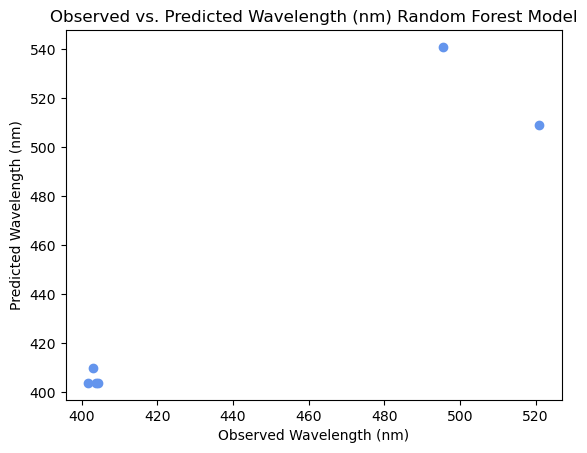

In [54]:
graph_model('Random Forest', 1)